Data loaded. Shape: (891, 12)

Missing values after cleaning: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_22200\3657620981.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_22200\3657620981.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

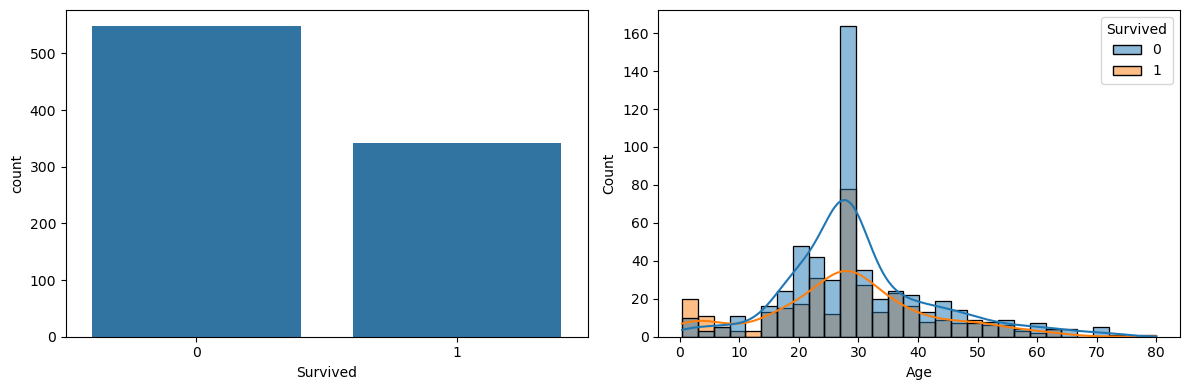


Model Performance:
                  Model  Accuracy  Precision    Recall        F1
2        Random Forest  0.804469   0.774648  0.743243  0.758621
0  Logistic Regression  0.798883   0.771429  0.729730  0.750000
1        Decision Tree  0.787709   0.750000  0.729730  0.739726


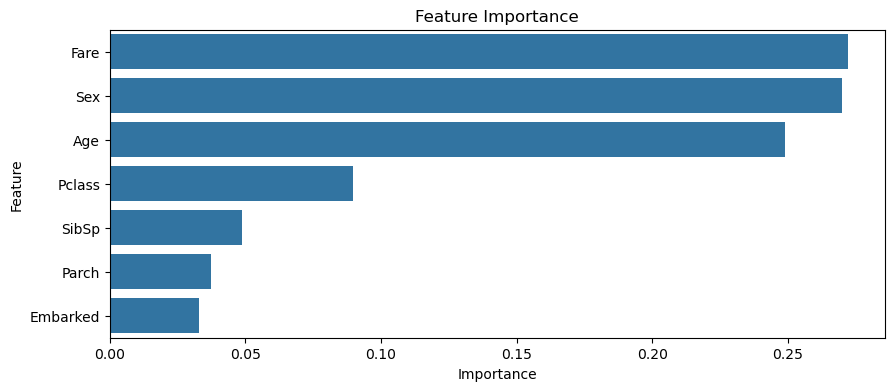

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Data
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print("Data loaded. Shape:", data.shape)

# 2. Data Cleaning
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print("\nMissing values after cleaning:", data.isnull().sum().sum())

# 3. EDA Visualizations
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='Survived', data=data)
plt.subplot(1,2,2)
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.tight_layout()
plt.show()

# 4. Prepare Data
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Training & Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = []
for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    })

# 6. Results
results_df = pd.DataFrame(results)
print("\nModel Performance:\n", results_df.sort_values('Accuracy', ascending=False))

# 7. Feature Importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance')
plt.show()